<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/CS575_MidSem_solution/A2_Dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution for Dataset3

In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#importing the dataset

D3 = pd.read_csv("Dataset3_nasdaq_1985_2014.csv", names = ["actual"])
D3.head()

,actual
0,3888.09
1,3857.94
2,3874.27
3,3874.94
4,3908.77


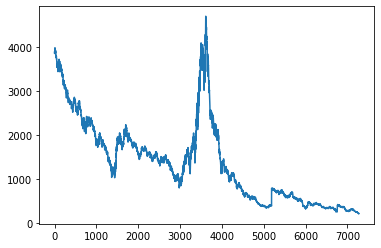

In [ ]:
plt.plot(D3['actual'])

#KPSS Test

In [ ]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D3[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('actual')

Results of KPSS Test for  actual
Test Statistic           12.143812
p-value                   0.010000
Lags Used                36.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D3 , the value of the test statistic is greater than the critical value at all confidence intervals in the KPSS test, hence the series is non stationary.

#ADF Test

In [ ]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D3[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('actual')

Results of Dickey-Fuller Test for  actual 

Test Statistic                   -2.381102
p-value                           0.147141
#Lags Used                       35.000000
Number of Observations Used    7240.000000
Critical Value (1%)              -3.431254
Critical Value (5%)              -2.861939
Critical Value (10%)             -2.566983
dtype: float64


>For the given dataset D3 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test, hence  the series is non stationary.


**Since, both tests conclude that the series is non stationary, therefore, the dataset is concluded as Non Stationary.**

# making non stationary series to stationary

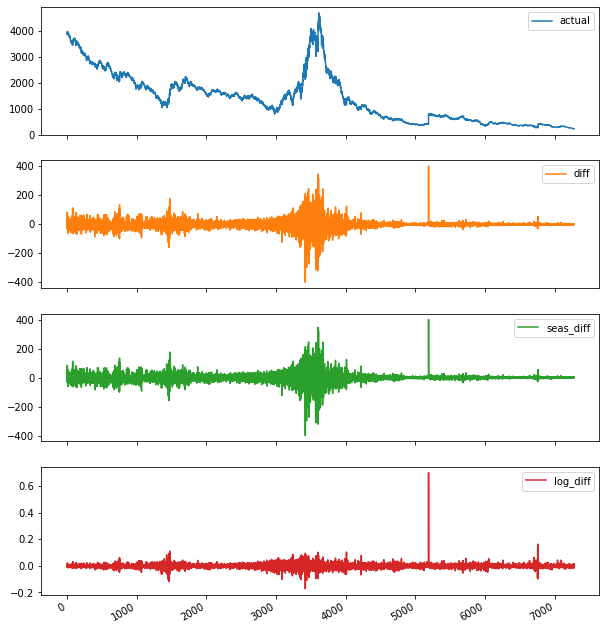

In [ ]:
# Differencing
D3['diff'] = D3['actual'].diff(periods=1)

# Seasonal Differencing
D3['seas_diff'] = D3['actual'].diff(periods=1)

# Transformation (here we use log transformation)
D3_log = np.log(D3['actual'])
D3['log_diff'] = D3_log.diff(periods=1)

D3.plot(subplots=True, figsize=(10,12))
plt.show()



> From the above plot we can visiualise that coloumn log_diff is stationary series




In [ ]:
data = D3['actual']

#Single Exponential Smoothing

In [ ]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

In [ ]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [ ]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [ ]:
#Calculating mean absolute error function for single exponential smoothing 

def MAE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE


In [ ]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=2), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=4), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=8), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=12), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=24), "\n")

MSE for alpha =.4 is   1515.4431892222867 

MSE for alpha =.35 is  2109.3801074529774 

MSE for alpha =.65 is  1480.4305946599552 

MSE for alpha =.85 is  1091.1829606672313 

MSE for alpha =.65 is  2851.012360790199 

MSE for alpha =.85 is  1745.7915913447398 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_SES(data, .4 ,interval=1), "\n")
print("MAE  is " ,MAE_SES(data, .4  ,interval=2), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=4), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=8), "\n")
print("MAE  is " ,MAE_SES(data,.4  ,interval=12), "\n")
print("MAE  is " ,MAE_SES(data,.4 ,interval=24), "\n")

MAE  is  21.355617040046365 

MAE  is  24.088571036089164 

MAE  is  30.465650544609684 

MAE  is  40.50366714134317 

MAE  is  50.656881983647125 

MAE  is  73.3454452436858 



#Double Exponential Smoothing

In [ ]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [ ]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for double exponential smoothing 

def MAE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=2), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=4), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=8), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=12), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=24), "\n")


MSE for alpha =.4,  beta = .2  is  1607.2881281068817 

MSE for alpha =.35, beta = .5  is  3310.5516498351135 

MSE for alpha =.85, beta = .6  is  4537.862256810189 

MSE for alpha =.45, beta = .6  is  10459.372349153586 

MSE for alpha =.7,  beta = .55 is  13654.093966098233 

MSE for alpha =.2,  beta = .6  is  57665.504533328385 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=1), "\n")
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=2), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=4), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=8), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=12), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=24), "\n")

MAE  is  21.69472930416115 

MAE  is  29.609059454419167 

MAE  is  41.04007315704296 

MAE  is  59.82496355021401 

MAE  is  76.45615811875881 

MAE  is  112.88841612167026 



#Triple Exponential Smoothing

In [ ]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [ ]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for Triple exponential smoothing 

def MAE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,1, .35, .5, .3, interval=2), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,1, .45, .6, .4 ,interval=4), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=12), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=24), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  131.1391742132832 

MSE for alpha =.35, beta = .5,  gamma = .3  is  607.588146960391 

MSE for alpha =.45, beta = .6,  gamma = .4  is  834.4877259788155 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  1067.6462198132922 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  2225.839753673527 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  4845.662803494255 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=2), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=4), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=12), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=24), "\n")

MAE  is  6.293700117207059 

MAE  is  8.80745243778473 

MAE  is  12.769487781217768 

MAE  is  19.495273780566755 

MAE  is  25.085040243260252 

MAE  is  37.50917931617524 



# AR

In [ ]:
#fit model
model=ARIMA(D3['log_diff'].dropna(), order=(1,0,0))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D3['forecast1'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:               log_diff   No. Observations:                 7275
Model:                     ARMA(1, 0)   Log Likelihood               18485.506
Method:                       css-mle   S.D. of innovations              0.019
Date:                Mon, 01 Mar 2021   AIC                         -36965.012
Time:                        05:43:47   BIC                         -36944.335
Sample:                             0   HQIC                        -36957.901
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0004      0.000     -1.782      0.075      -0.001    3.91e-05
ar.L1.log_diff    -0.0159      0.012     -1.359      0.174      -0.039       0.007
                                    

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D3['log_diff'],D3['forecast1'])).mean() 
print("MSE for AR is", MSE)

MSE for AR is 0.00036347388846149514


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D3['log_diff'],D3['forecast1'])).mean() 
print("MAE for AR is", MAE)


MAE for AR is 0.011831845162916653


# MA

In [ ]:
#fit model
model=ARIMA(D3['log_diff'].dropna(), order=(0,0,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D3['forecast2'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:               log_diff   No. Observations:                 7275
Model:                     ARMA(0, 1)   Log Likelihood               18485.611
Method:                       css-mle   S.D. of innovations              0.019
Date:                Mon, 01 Mar 2021   AIC                         -36965.222
Time:                        05:43:47   BIC                         -36944.545
Sample:                             0   HQIC                        -36958.111
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0004      0.000     -1.786      0.074      -0.001    3.82e-05
ma.L1.log_diff    -0.0177      0.012     -1.434      0.152      -0.042       0.007
                                    

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D3['log_diff'],D3['forecast2'])).mean() 
print("MSE for MR is", MSE)

MSE for MR is 0.00036346337947605064


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D3['log_diff'],D3['forecast2'])).mean() 
print("MAE for MR is", MAE)


MAE for MR is 0.011832984393080111


# ARIMA

In [ ]:
#fit model
model=ARIMA(D3['actual'].dropna(), order=(1,1,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D3['forecast3'] = model_fit.predict()

                             ARIMA Model Results                              
Dep. Variable:               D.actual   No. Observations:                 7275
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -35782.761
Method:                       css-mle   S.D. of innovations             33.104
Date:                Mon, 01 Mar 2021   AIC                          71573.521
Time:                        05:43:48   BIC                          71601.090
Sample:                             1   HQIC                         71583.003
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5036      0.320     -1.573      0.116      -1.131       0.124
ar.L1.D.actual     0.5945      0.068      8.791      0.000       0.462       0.727
ma.L1.D.actual    -0.6655      0.063

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D3['log_diff'],D3['forecast3'])).mean() 
print("MSE for ARIMA is", MSE)

MSE for ARIMA is 8.78745535569359


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D3['log_diff'],D3['forecast3'])).mean() 
print("MAE for ARIMA is", MAE)


MAE for ARIMA is 1.6994350554387914


# Optimal model check

In [ ]:
!pip3 install pmdarima
import pmdarima as pm

In [ ]:
model = pm.auto_arima(D3.iloc[:,0], start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True,stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=71573.519, Time=2.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=71626.005, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=71602.481, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=71598.884, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=71625.676, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=71573.861, Time=4.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=71573.643, Time=3.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=71574.051, Time=2.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=71575.909, Time=0.77 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=71575.157, Time=5.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=71573.985, Time=0.83 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 21.300 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

so best optimal model is ARIMA(1,1,1)

# table

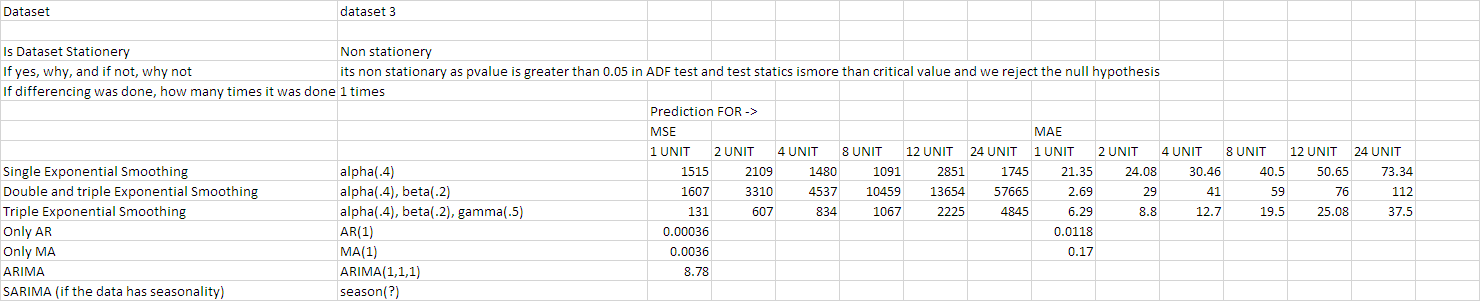